In [1]:
import json
import pandas as pd

NAME_FILE = '../name_mapping.json'
f = open(NAME_FILE)
name_data = json.load(f)

In [2]:
PAIR_MATCHING_CSV = '../data/pair_matching.csv'

data = pd.read_csv(PAIR_MATCHING_CSV)

In [3]:
data.describe()

,eid,mean_20131,mean_20132,mean_20133
count,1.155160e+05,115516.000000,115516.000000,115516.000000
mean,3.505471e+06,4.631283,2.788207,23487.141774
std,1.450371e+06,0.467183,1.670499,10132.447564
min,1.000085e+06,1.500000,0.000000,1755.500000
25%,2.252365e+06,4.500000,1.500000,16394.250000
50%,3.499489e+06,4.500000,2.500000,21349.000000
75%,4.762362e+06,4.500000,3.500000,28144.500000
max,6.024933e+06,5.666667,23.000000,94984.000000


In [4]:
# number of correct matches
data['mean_20131'].sort_values()

73281    1.500000
42661    1.500000
21687    1.500000
67685    1.500000
94654    1.500000
           ...   
16363    5.666667
68065    5.666667
96856    5.666667
96849    5.666667
53967    5.666667
Name: mean_20131, Length: 115516, dtype: float64

In [5]:
# number of incorrect matches
data['mean_20132'].sort_values()

88917      0.0
3436       0.0
69207      0.0
109093     0.0
9865       0.0
          ... 
24114     22.5
85144     22.5
47775     22.5
85951     23.0
14829     23.0
Name: mean_20132, Length: 115516, dtype: float64

In [6]:
renamed_pm = data.rename(columns=name_data)
renamed_pm

,subject_id,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time
0,1000085,4.500000,1.000000,22838.0
1,1000158,4.500000,5.000000,35523.0
2,1000193,5.666667,4.000000,46227.0
3,1000251,4.500000,4.000000,14591.0
4,1000279,5.666667,3.333333,21993.0
...,...,...,...,...
115511,6024683,4.500000,2.500000,21135.0
115512,6024769,4.500000,5.000000,33188.5
115513,6024781,4.500000,1.500000,14452.0
115514,6024822,4.500000,3.000000,23481.0


<AxesSubplot:>

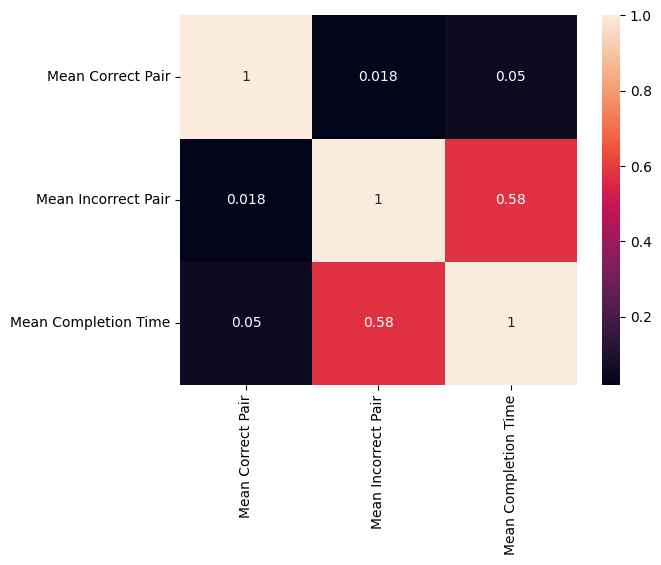

In [7]:
import seaborn as sns

corr_matrix = renamed_pm[renamed_pm.columns[1:]].corr()
sns.heatmap(corr_matrix, annot=True)

In [8]:
# renamed_pm.to_csv('../processed_data/pair_matching.csv', index=False)

# Calculate Error Rate